# Naive bayes classifier

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
# df=pd.read_csv(r'C:\Users\Hotu Ram\OneDrive\Desktop\python\NB-classifier\Placement_Data_Full_Class.csv')
df=pd.read_csv('data\Placement_Data_Full_Class.csv')
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [6]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [7]:
# pre- processing
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
df=df.drop(['salary'], axis = 1)

In [9]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

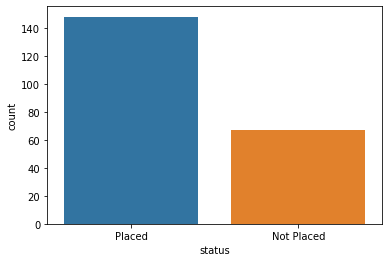

In [10]:
sns.countplot(x= 'status', data=df)

<AxesSubplot:xlabel='status', ylabel='count'>

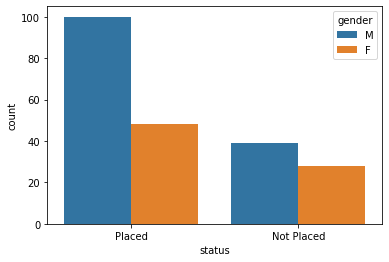

In [11]:
sns.countplot(x='status', hue='gender', data=df)

In [12]:
#convert categorical variable into indicator variables
workexp = pd.get_dummies(df['workex'])

In [13]:
workexp

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
210,1,0
211,1,0
212,0,1
213,1,0


In [14]:
# Concantenate data into original dataset.
df=pd.concat([df,workexp],axis=1)


In [15]:
# df.drop(['sl_no','gender','ssc_b','hsc_s','hsc_b','degree_t','workex','specialisation'],axis=1,inplace=True)
df=df.drop(['sl_no','gender','ssc_b','hsc_s','hsc_b','degree_t','workex','specialisation'],axis=1)

In [16]:
df

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,No,Yes
0,67.00,91.00,58.00,55.0,58.80,Placed,1,0
1,79.33,78.33,77.48,86.5,66.28,Placed,0,1
2,65.00,68.00,64.00,75.0,57.80,Placed,1,0
3,56.00,52.00,52.00,66.0,59.43,Not Placed,1,0
4,85.80,73.60,73.30,96.8,55.50,Placed,1,0
...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,Placed,1,0
211,58.00,60.00,72.00,74.0,53.62,Placed,1,0
212,67.00,67.00,73.00,59.0,69.72,Placed,0,1
213,74.00,66.00,58.00,70.0,60.23,Placed,1,0


In [17]:
# Train Test Data
X=df.drop('status',axis=1)
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [18]:
#Apply Naive Bayes theorem
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)


GaussianNB()

In [19]:
# compare actual and predicted
y_pred=model.predict(X_test)
df1=pd.DataFrame({'Actual Status':y_test,'Predicted Status':y_pred})

In [20]:
df1

,Actual Status,Predicted Status
108,Placed,Placed
207,Placed,Placed
106,Not Placed,Not Placed
107,Placed,Placed
51,Not Placed,Not Placed
...,...,...
114,Placed,Placed
127,Placed,Placed
116,Placed,Placed
117,Placed,Placed


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Not Placed       0.75      0.90      0.82        20
      Placed       0.95      0.87      0.91        45

    accuracy                           0.88        65
   macro avg       0.85      0.88      0.86        65
weighted avg       0.89      0.88      0.88        65



In [22]:
print(confusion_matrix(y_test,y_pred))

[[18  2]
 [ 6 39]]


In [23]:
print(accuracy_score(y_test,y_pred)*100)

87.6923076923077


Final Tip

alt+window key +j for murge the cells
